<a href="https://colab.research.google.com/github/kc6699c/Komal_INFO5731_Fall2024/blob/main/Cherukuri_INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [5]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.1 MB/s eta 0:00:00


In [6]:
# Write your code here
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from bertopic import BERTopic
file_path = '/content/Amazon_Product_Reviews.csv'
data = pd.read_csv(file_path)

text_data = data['review_text'].dropna()

### 1. LDA (Latent Dirichlet Allocation)
print("=== LDA Topic Modeling ===")
count_vectorizer = CountVectorizer(max_features=5000, stop_words='english')
count_matrix = count_vectorizer.fit_transform(text_data)

lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(count_matrix)

lda_topics = []
for idx, topic in enumerate(lda_model.components_):
    top_words = [count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    lda_topics.append(f"Topic {idx+1}: {', '.join(top_words)}")
    print(f"Topic {idx+1}: {', '.join(top_words)}")

### 2. LSA (Latent Semantic Analysis)
print("\n=== LSA Topic Modeling ===")
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_model.fit(tfidf_matrix)

lsa_topics = []
for idx, component in enumerate(lsa_model.components_):
    top_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in component.argsort()[-10:]]
    lsa_topics.append(f"Topic {idx+1}: {', '.join(top_words)}")
    print(f"Topic {idx+1}: {', '.join(top_words)}")

### 3. BERTopic
print("\n=== BERTopic Topic Modeling ===")
bert_topic_model = BERTopic()
topics, _ = bert_topic_model.fit_transform(text_data)

bert_topics = bert_topic_model.get_topics()
bert_topic_keywords = {}
for topic_id, words in bert_topics.items():
    if topic_id >= 0 and topic_id < 10:
        bert_topic_keywords[f"Topic {topic_id+1}"] = [word for word, _ in words]

for topic_id, words in bert_topic_keywords.items():
    print(f"{topic_id}: {', '.join(words)}")

print("\n=== Topic Summarization ===")
print("LDA Topics:")
for topic in lda_topics:
    print(topic)

print("\nLSA Topics:")
for topic in lsa_topics:
    print(topic)

print("\nBERTopic Keywords:")
for topic_id, words in bert_topic_keywords.items():
    print(f"{topic_id}: {', '.join(words)}")

=== LDA Topic Modeling ===
Topic 1: daily, softens, used, enjoy, skin, great, irritate, did, sensitive, read
Topic 2: plus, hypoallergenic, hassle, provides, long, products, feeling, skin, body, sensitive
Topic 3: fresh, water, need, bath, added, product, great, fragrance, free, body
Topic 4: day, years, price, size, feeling, nice, leaves, read, great, skin
Topic 5: quality, way, just, goods, evil, free, great, price, read, skin
Topic 6: certain, areas, sting, smooth, nice, does, leaves, soft, read, skin
Topic 7: body, pump, nice, lather, dry, smell, skin, great, use, read
Topic 8: dove, dry, use, pump, product, deep, moisture, wash, body, skin
Topic 9: shower, just, pump, skin, read, doesn, use, product, bottle, soap
Topic 10: fragrance, love, dove, skin, pump, soap, smells, great, read, using

=== LSA Topic Modeling ===
Topic 1: did, pump, irritate, price, use, body, read, great, skin, sensitive
Topic 2: good, creamy, smooth, areas, burn, sting, certain, price, leaves, soft
Topic 3: 

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Topic 1: sensitive, the, without, feeling, in, to, for, greasy, flipping, cap
Topic 2: arent, feeing, finding, hard, strong, hint, quality, too, good, so
Topic 3: it, but, not, fragrance, as, to, other, water, free, need
Topic 4: aroma, wonderful, rinses, off, easily, works, lathers, has, dry, have
Topic 5: certain, areas, sting, burn, creamy, smooth, does, leaves, soft, and
Topic 6: moisturizes, easytouse, fresh, smell, lather, your, pump, well, body, read
Topic 7: irritate, did, price, sensitive, not, great, my, read, more, skin
Topic 8: using, afterwards, now, bars, nicely, up, loves, slight, really, always
Topic 9: simple, makes, well, out, my, good, works, doesnt, lathers, soft
Topic 10: advertised, wellpriced, purchase, quite, refreshed, again, handy, sink, what, is

=== Topic Summarization ===
LDA Topics:
Topic 1: daily, softens, used, enjoy, skin, great, irritate, did, sensitive, read
Topic 2: plus, hypoallergenic, hassle, provides, long, products, feeling, skin, body, sensitiv

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

file_path = '/content/Amazon_Product_Reviews.csv'
data = pd.read_csv(file_path)

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(data['review_text'])
y = data['SA']  # Sentiment labels column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel='linear', probability=True, random_state=42)
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    results[model_name] = {
        "CV Mean Accuracy": cv_scores.mean(),
        "CV Std Dev": cv_scores.std()
    }

evaluation_metrics = []

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    evaluation_metrics.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

evaluation_df = pd.DataFrame(evaluation_metrics)
print("Cross-Validation Results:")
print(pd.DataFrame(results).T)
print("\nEvaluation Metrics:")
print(evaluation_df)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Results:
             CV Mean Accuracy  CV Std Dev
Naive Bayes          0.968344    0.011127
SVM                  0.996349    0.002981

Evaluation Metrics:
         Model  Accuracy  Precision    Recall  F1 Score
0  Naive Bayes  0.970874   0.990195  0.970874  0.980439
1          SVM  0.995146   0.990315  0.995146  0.992724


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int6

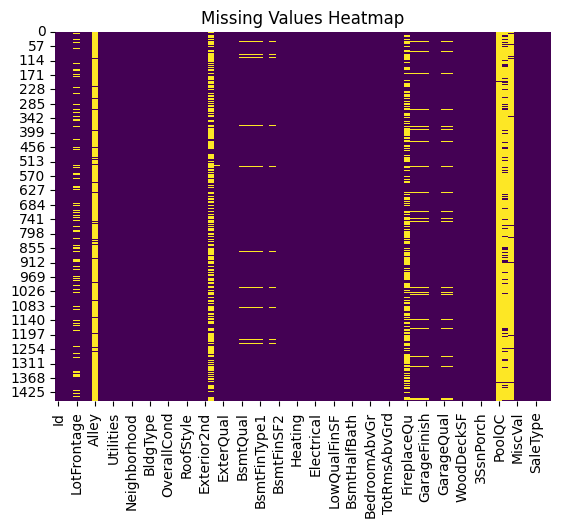

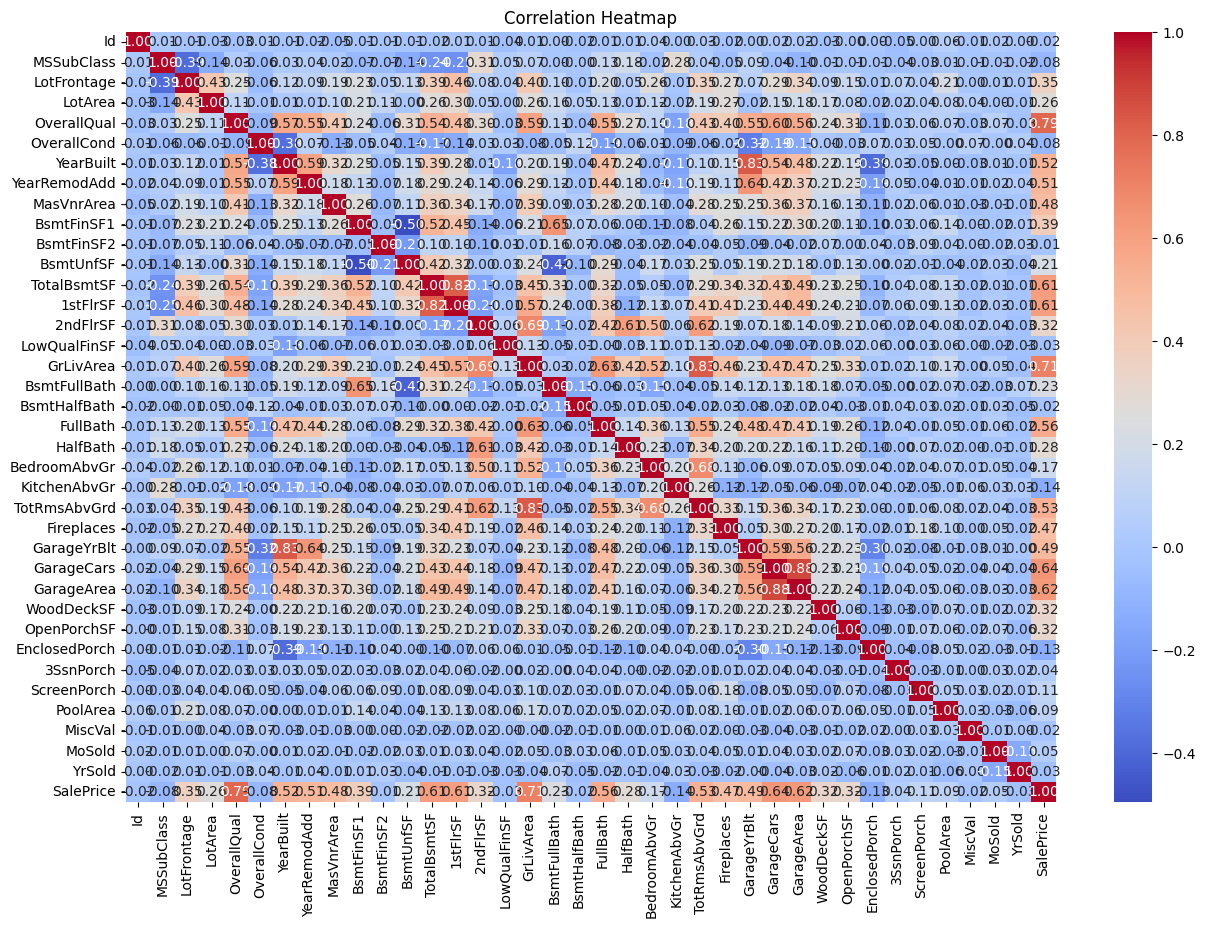

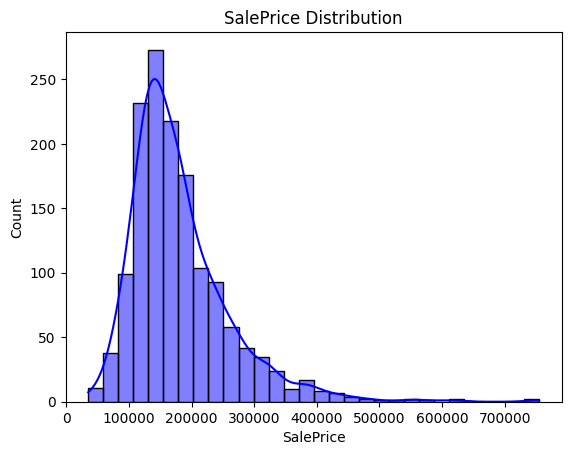

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

train_data_path = '/content/train.csv'
test_data_path = '/content/test.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

print("Train Data Info:")
print(train_data.info())
print("\nTrain Data Summary:")
print(train_data.describe())

missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("\nMissing Values:")
print(missing_values)

sns.heatmap(train_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
correlation = train_data[numeric_cols].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.histplot(train_data['SalePrice'], kde=True, color='blue', bins=30)
plt.title("SalePrice Distribution")
plt.show()

In [10]:
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    else:
        train_data[col].fillna(train_data[col].median(), inplace=True)

for col in test_data.columns:
    if test_data[col].dtype == 'object':
        test_data[col].fillna(test_data[col].mode()[0], inplace=True)
    else:
        test_data[col].fillna(train_data[col].median(), inplace=True)  # Use train's median for consistency

train_data = pd.get_dummies(train_data, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)

test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

In [11]:
X_train = train_data.drop(columns=['SalePrice'])
y_train = train_data['SalePrice']

X_test = test_data.drop(columns=['SalePrice'], errors='ignore')

In [12]:
from sklearn.model_selection import cross_val_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
y_pred_lr = lr_model.predict(X_test)

y_pred_rf = rf_model.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-Squared (R2): {r2}")
    print("\n")

if 'SalePrice' in test_data.columns:
    y_test = test_data['SalePrice']
    print("=== Evaluation Results ===")
    evaluate_model(y_test, y_pred_lr, "Linear Regression")
    evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")
else:
    print("No 'SalePrice' in test data. Predictions completed.")

=== Evaluation Results ===
Model: Linear Regression
Mean Absolute Error (MAE): 414009.17464378953
Mean Squared Error (MSE): 177771038446.78827
Root Mean Squared Error (RMSE): 421629.0294166049
R-Squared (R2): 0.0


Model: Random Forest Regressor
Mean Absolute Error (MAE): 178960.3363468129
Mean Squared Error (MSE): 37325510837.157425
Root Mean Squared Error (RMSE): 193198.11292338604
R-Squared (R2): 0.0




# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


RoBERTa is a highly advanced language model trained on a variety of large datasets, including BookCorpus, English Wikipedia, OpenWebText, and CC-News. It uses much more training data compared to BERT, which helps it perform better on a wide range of tasks.

The RoBERTa-base model has around 125 million parameters, striking a good balance between efficiency and performance. For this task, we’re using it in a zero-shot setting, so there’s no fine-tuning involved. This means we can directly use it to predict sentiment without additional training.

RoBERTa improves on BERT by removing the Next Sentence Prediction (NSP) objective, which wasn’t very effective. It also uses larger batches, longer sequences, and a bigger vocabulary, making it more robust and accurate.

In [14]:
# Write your code here
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

file_path = '/content/Amazon_Product_Reviews.csv'
data = pd.read_csv(file_path)

texts = data['review_text'].tolist()
true_labels = data['SA'].map({'Positive': 1, 'Negative': 0}).tolist()

zero_shot_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

candidate_labels = ["positive", "negative"]

predictions = []
for text in texts:
    result = zero_shot_classifier(text, candidate_labels)
    predicted_label = result['labels'][0]
    predictions.append(1 if predicted_label == "positive" else 0)

accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Evaluation Metrics:
Accuracy: 0.9688
Precision: 0.9960
Recall: 0.9726
F1 Score: 0.9842


Advantages:

Zero-shot Capability: RoBERTa (via facebook/bart-large-mnli) provides robust zero-shot classification without requiring fine-tuning, making it efficient for small-scale tasks with limited labeled data.
High Generalization: The model generalizes well due to extensive pretraining on diverse datasets.
Ease of Use: Hugging Face pipelines simplify the implementation process, reducing setup and execution time.
Disadvantages:

Computational Cost: Running a PLM like RoBERTa can be computationally expensive due to its size and complexity, particularly on large datasets.
Performance Limitation: Zero-shot performance may lag behind task-specific fine-tuned models for high-stakes applications.
Contextual Limitations: While RoBERTa performs well on straightforward sentiment tasks, it may struggle with nuanced or domain-specific text.
Challenges Encountered:

Label Mapping: Matching model-predicted labels to dataset labels required careful handling to align "positive" and "negative" with ground truth.
Inference Time: Processing a large dataset in zero-shot mode can be slow due to the lack of optimization for this use case.